<a href="https://colab.research.google.com/github/s-ryuri/TIL/blob/main/%EB%A7%88%EB%AC%B4%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd drive/MyDrive/Colab/9월16일

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
import warnings
#ignore warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

plt.rc('font', family='NanumBarunGothic') 
def change_matplotlib_font(font_download_url):
    FONT_PATH = 'MY_FONT'
    
    font_download_cmd = f"wget {font_download_url} -O {FONT_PATH}.zip"
    unzip_cmd = f"unzip -o {FONT_PATH}.zip -d {FONT_PATH}"
    os.system(font_download_cmd)
    os.system(unzip_cmd)
    
    font_files = fm.findSystemFonts(fontpaths=FONT_PATH)
    for font_file in font_files:
        fm.fontManager.addfont(font_file)

    font_name = fm.FontProperties(fname=font_files[0]).get_name()
    matplotlib.rc('font', family=font_name)
    print("font family: ", plt.rcParams['font.family'])

font_download_url = "https://fonts.google.com/download?family=Noto%20Sans%20KR"
change_matplotlib_font(font_download_url)

Mounted at /content/drive
/content/drive/MyDrive/Colab/9월16일
font family:  ['Noto Sans KR']


In [72]:
powerfactor = pd.read_csv('new역률평균')
powerfactor2 = pd.read_csv('new역률평균_98_0917)')
electric = pd.read_csv('new전류평균')
electric2 = pd.read_csv('new전류평균_98_0917')
voltage = pd.read_csv('new전압평균')
voltage2 = pd.read_csv('new전압평균_98_0917_v1')

일단 평균을 다 뺌 진짜 평균이기 때문에 이미 다른 값들이 다 있기 때문에 평균을 뺌

In [74]:
powerfactor.drop(['무효전력평균','상전압평균','선간전압평균','역률평균','유효전력평균','전류고조파평균','전류평균','전압고조파평균'],axis = 1,inplace = True)
electric.drop(['무효전력평균','상전압평균','선간전압평균','역률평균','유효전력평균','전류고조파평균','전류평균','전압고조파평균'],axis = 1,inplace = True)
voltage.drop(['무효전력평균','상전압평균','선간전압평균','역률평균','유효전력평균','전류고조파평균','전류평균','전압고조파평균'],axis = 1,inplace = True)
voltage2.drop(['무효전력평균','상전압평균','선간전압평균','역률평균','유효전력평균','전류고조파평균','전류평균','전압고조파평균'],axis = 1,inplace = True)
electric2.drop(['무효전력평균','상전압평균','선간전압평균','역률평균','유효전력평균','전류고조파평균','전류평균','전압고조파평균'],axis = 1,inplace = True)
powerfactor2.drop(['무효전력평균','상전압평균','선간전압평균','역률평균','유효전력평균','전류고조파평균','전류평균','전압고조파평균'],axis = 1,inplace = True)

In [75]:
voltage = pd.concat([voltage,voltage2])
electric = pd.concat([electric,electric2])
powerfactor = pd.concat([powerfactor,powerfactor2])

In [76]:
powerfactor.rename(columns = {'LABEL_NAME':'POWER_LABEL'},inplace = True)
electric.rename(columns = {'LABEL_NAME':'ELECTRIC_LABEL'},inplace = True)
voltage.rename(columns = {'LABEL_NAME':'VOLTAGE_LABEL'},inplace = True)

In [77]:
powerfactor

,R상무효전력,R상선간전압,R상역률,R상유효전력,R상전류,R상전류고조파,R상전압,R상전압고조파,S상무효전력,S상선간전압,S상역률,S상유효전력,S상전류,S상전류고조파,S상전압,S상전압고조파,T상무효전력,T상선간전압,T상역률,T상유효전력,T상전류,T상전류고조파,T상전압,T상전압고조파,누적전력량,온도,주파수,TIMESTAMP,POWER_LABEL
0,0.0,227.50,0.0,0.0,0.0,0.0,131.00,2.539063,0.0,228.25,0.0,0.0,0.0,0.0,131.75,2.343750,0.0,227.25,0.0,0.0,0.0,0.0,131.50,2.636719,0.000,31.875,59.938175,2021-01-16 00:00,경고
1,0.0,226.75,0.0,0.0,0.0,0.0,130.50,2.539063,0.0,227.75,0.0,0.0,0.0,0.0,131.25,2.343750,0.0,226.50,0.0,0.0,0.0,0.0,131.25,2.636719,0.000,33.125,59.956898,2021-01-16 00:01,경고
2,0.0,227.75,0.0,0.0,0.0,0.0,131.25,2.539063,0.0,228.50,0.0,0.0,0.0,0.0,132.00,2.539063,0.0,227.25,0.0,0.0,0.0,0.0,131.75,2.539063,0.000,32.500,59.910122,2021-01-16 00:02,경고
3,0.0,227.00,0.0,0.0,0.0,0.0,130.75,2.539063,0.0,228.25,0.0,0.0,0.0,0.0,131.75,2.343750,0.0,227.00,0.0,0.0,0.0,0.0,131.50,2.636719,0.000,31.875,59.947537,2021-01-16 00:03,경고
4,0.0,228.00,0.0,0.0,0.0,0.0,131.50,2.734375,0.0,229.00,0.0,0.0,0.0,0.0,132.00,2.441406,0.0,227.75,0.0,0.0,0.0,0.0,131.75,2.636719,0.000,32.500,59.928820,2021-01-16 00:04,경고
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42978,0.0,384.00,0.0,0.0,0.0,0.0,220.50,4.101563,0.0,381.25,0.0,0.0,0.0,0.0,221.75,4.296875,0.0,381.50,0.0,0.0,0.0,0.0,219.00,4.980469,154200.156,10.000,59.938183,2020-11-22 23:55,경고
42979,0.0,383.25,0.0,0.0,0.0,0.0,220.00,4.101563,0.0,380.50,0.0,0.0,0.0,0.0,221.50,4.199219,0.0,380.75,0.0,0.0,0.0,0.0,218.25,4.980469,154200.156,10.000,59.910122,2020-11-22 23:56,경고
42980,0.0,383.00,0.0,0.0,0.0,0.0,219.75,4.101563,0.0,380.25,0.0,0.0,0.0,0.0,221.25,4.296875,0.0,380.75,0.0,0.0,0.0,0.0,218.25,4.980469,154200.156,9.375,59.928820,2020-11-22 23:57,경고
42981,0.0,383.00,0.0,0.0,0.0,0.0,220.00,4.199219,0.0,380.25,0.0,0.0,0.0,0.0,221.25,4.199219,0.0,380.75,0.0,0.0,0.0,0.0,218.25,4.980469,154200.156,9.375,59.928820,2020-11-22 23:58,경고


Text(0, 0.5, '개수')

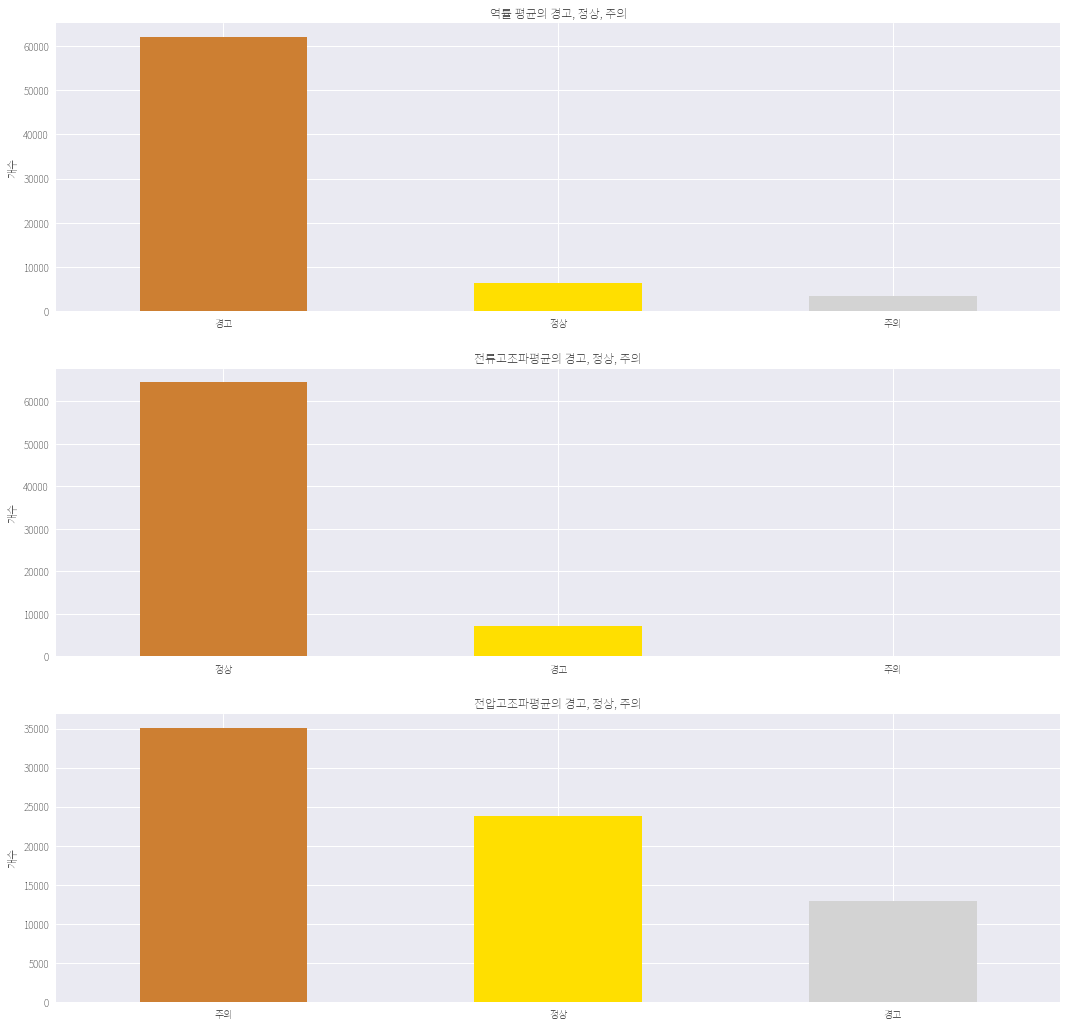

In [78]:
fig, ax = plt.subplots(3,1,figsize = (18,18))


powerfactor['POWER_LABEL'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0], rot = 0)
ax[0].set_title('역률 평균의 경고, 정상, 주의')
ax[0].set_ylabel('개수')
plt.xticks(rotation = 90)
electric['ELECTRIC_LABEL'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[1],rot = 0)
ax[1].set_title('전류고조파평균의 경고, 정상, 주의')
ax[1].set_ylabel('개수')
voltage['VOLTAGE_LABEL'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[2], rot = 0)
ax[2].set_title('전압고조파평균의 경고, 정상, 주의')
ax[2].set_ylabel('개수')

In [79]:
data = pd.concat([powerfactor,electric[['ELECTRIC_LABEL']],voltage[['VOLTAGE_LABEL']]],axis = 1)

In [16]:
data.to_csv('9월17일LABEL')

In [80]:
data['FINAL_LABEL'] = 0

일단 이 데이터는 레이블을 다 합친 데이터


In [81]:
# 다 같은거 뽑고
same_label = data[(data['POWER_LABEL'] == data['ELECTRIC_LABEL']) &(data['POWER_LABEL'] == data['VOLTAGE_LABEL'])]
same_label['FINAL_LABEL'] = same_label['POWER_LABEL']
same_label.drop(['POWER_LABEL','ELECTRIC_LABEL','VOLTAGE_LABEL'],axis = 1,inplace = True)

In [82]:
same_label_index = list(same_label.index)
same_label_index
same_label = same_label.reset_index(drop= True)

In [83]:
# 1 : 1 : 1 뽑는다
all_diff_label = data[(data['POWER_LABEL'] != data['ELECTRIC_LABEL']) &(data['POWER_LABEL'] != data['VOLTAGE_LABEL']) &(data['ELECTRIC_LABEL'] != data['VOLTAGE_LABEL'])]
all_diff_label_index = list(all_diff_label.index)
all_diff_label_index
all_diff_label = all_diff_label.reset_index(drop= True)

In [84]:
# 2 : 1 뽑는다
# 1 : 1 : 1, 다 같은 데이터를 빼줘서 2대 1을 얻음

total_index = same_label_index + all_diff_label_index

two_one_label = data.drop(total_index,axis = 0)

two_one_label= two_one_label.reset_index(drop=True)

In [85]:
two_one_label[['POWER_LABEL','ELECTRIC_LABEL','VOLTAGE_LABEL']]

,POWER_LABEL,ELECTRIC_LABEL,VOLTAGE_LABEL
0,경고,정상,정상
1,경고,정상,정상
2,경고,정상,정상
3,경고,정상,정상
4,경고,정상,정상
...,...,...,...
26345,경고,정상,경고
26346,경고,정상,경고
26347,경고,정상,경고
26348,경고,정상,경고


In [86]:
two_dict = {}
idx = 0
for one,two,three in zip(two_one_label['POWER_LABEL'],two_one_label['ELECTRIC_LABEL'],two_one_label['VOLTAGE_LABEL']):
    two_dict = {'경고' : 0, '정상' : 0, '주의' : 0}
    two_dict[one] += 1
    two_dict[two] += 1
    two_dict[three] += 1
    if two_dict['경고'] == 2:
        two_one_label.loc[idx,'FINAL_LABEL'] = '경고'
    elif two_dict['정상'] == 2:
        two_one_label.loc[idx,'FINAL_LABEL'] = '정상'
    elif two_dict['주의'] == 2:
        two_one_label.loc[idx,'FINAL_LABEL'] = '주의'
    idx += 1
two_one_label

# 2대1인 데이터에서 2를 뽑는 for 문

,R상무효전력,R상선간전압,R상역률,R상유효전력,R상전류,R상전류고조파,R상전압,R상전압고조파,S상무효전력,S상선간전압,S상역률,S상유효전력,S상전류,S상전류고조파,S상전압,S상전압고조파,T상무효전력,T상선간전압,T상역률,T상유효전력,T상전류,T상전류고조파,T상전압,T상전압고조파,누적전력량,온도,주파수,TIMESTAMP,POWER_LABEL,ELECTRIC_LABEL,VOLTAGE_LABEL,FINAL_LABEL
0,0.0,227.50,0.0,0.0,0.0,0.0,131.00,2.539063,0.0,228.25,0.0,0.0,0.0,0.0,131.75,2.343750,0.0,227.25,0.0,0.0,0.0,0.0,131.50,2.636719,0.000,31.875,59.938175,2021-01-16 00:00,경고,정상,정상,정상
1,0.0,226.75,0.0,0.0,0.0,0.0,130.50,2.539063,0.0,227.75,0.0,0.0,0.0,0.0,131.25,2.343750,0.0,226.50,0.0,0.0,0.0,0.0,131.25,2.636719,0.000,33.125,59.956898,2021-01-16 00:01,경고,정상,정상,정상
2,0.0,227.75,0.0,0.0,0.0,0.0,131.25,2.539063,0.0,228.50,0.0,0.0,0.0,0.0,132.00,2.539063,0.0,227.25,0.0,0.0,0.0,0.0,131.75,2.539063,0.000,32.500,59.910122,2021-01-16 00:02,경고,정상,정상,정상
3,0.0,227.00,0.0,0.0,0.0,0.0,130.75,2.539063,0.0,228.25,0.0,0.0,0.0,0.0,131.75,2.343750,0.0,227.00,0.0,0.0,0.0,0.0,131.50,2.636719,0.000,31.875,59.947537,2021-01-16 00:03,경고,정상,정상,정상
4,0.0,228.00,0.0,0.0,0.0,0.0,131.50,2.734375,0.0,229.00,0.0,0.0,0.0,0.0,132.00,2.441406,0.0,227.75,0.0,0.0,0.0,0.0,131.75,2.636719,0.000,32.500,59.928820,2021-01-16 00:04,경고,정상,정상,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26345,0.0,382.00,0.0,0.0,0.0,0.0,219.25,5.078125,0.0,379.25,0.0,0.0,0.0,0.0,220.50,5.566406,0.0,379.75,0.0,0.0,0.0,0.0,217.75,5.566406,154200.156,10.000,59.938183,2020-11-22 23:44,경고,정상,경고,경고
26346,0.0,381.75,0.0,0.0,0.0,0.0,219.00,4.980469,0.0,378.75,0.0,0.0,0.0,0.0,220.25,5.273438,0.0,379.00,0.0,0.0,0.0,0.0,217.50,5.468750,154200.156,9.375,59.938210,2020-11-22 23:45,경고,정상,경고,경고
26347,0.0,382.75,0.0,0.0,0.0,0.0,219.75,5.078125,0.0,380.00,0.0,0.0,0.0,0.0,221.00,5.273438,0.0,380.25,0.0,0.0,0.0,0.0,218.00,5.371094,154200.156,9.375,59.891422,2020-11-22 23:46,경고,정상,경고,경고
26348,0.0,381.50,0.0,0.0,0.0,0.0,219.00,5.175781,0.0,378.75,0.0,0.0,0.0,0.0,220.25,5.468750,0.0,379.25,0.0,0.0,0.0,0.0,217.50,5.761719,154200.156,10.000,59.919464,2020-11-22 23:47,경고,정상,경고,경고


In [87]:
two_one_label[['POWER_LABEL','ELECTRIC_LABEL','VOLTAGE_LABEL','FINAL_LABEL']]

elec_count = two_one_label[two_one_label['ELECTRIC_LABEL'] == two_one_label['FINAL_LABEL']].shape[0]
volt_count = two_one_label[two_one_label['VOLTAGE_LABEL'] == two_one_label['FINAL_LABEL']].shape[0]
power_count= two_one_label[two_one_label['POWER_LABEL'] == two_one_label['FINAL_LABEL']].shape[0]

# 2대 1에서 가중치를 뽑는 코드

In [88]:
print(elec_count,volt_count,power_count)

14501 26264 11935


In [89]:
two_one_label.drop(['POWER_LABEL','ELECTRIC_LABEL','VOLTAGE_LABEL'],axis = 1,inplace = True)
two_one_label

# FINAL_LABEL로 넣어줬으니 POWER, ELECTRIC, VOLTAGE를 빼줌

,R상무효전력,R상선간전압,R상역률,R상유효전력,R상전류,R상전류고조파,R상전압,R상전압고조파,S상무효전력,S상선간전압,S상역률,S상유효전력,S상전류,S상전류고조파,S상전압,S상전압고조파,T상무효전력,T상선간전압,T상역률,T상유효전력,T상전류,T상전류고조파,T상전압,T상전압고조파,누적전력량,온도,주파수,TIMESTAMP,FINAL_LABEL
0,0.0,227.50,0.0,0.0,0.0,0.0,131.00,2.539063,0.0,228.25,0.0,0.0,0.0,0.0,131.75,2.343750,0.0,227.25,0.0,0.0,0.0,0.0,131.50,2.636719,0.000,31.875,59.938175,2021-01-16 00:00,정상
1,0.0,226.75,0.0,0.0,0.0,0.0,130.50,2.539063,0.0,227.75,0.0,0.0,0.0,0.0,131.25,2.343750,0.0,226.50,0.0,0.0,0.0,0.0,131.25,2.636719,0.000,33.125,59.956898,2021-01-16 00:01,정상
2,0.0,227.75,0.0,0.0,0.0,0.0,131.25,2.539063,0.0,228.50,0.0,0.0,0.0,0.0,132.00,2.539063,0.0,227.25,0.0,0.0,0.0,0.0,131.75,2.539063,0.000,32.500,59.910122,2021-01-16 00:02,정상
3,0.0,227.00,0.0,0.0,0.0,0.0,130.75,2.539063,0.0,228.25,0.0,0.0,0.0,0.0,131.75,2.343750,0.0,227.00,0.0,0.0,0.0,0.0,131.50,2.636719,0.000,31.875,59.947537,2021-01-16 00:03,정상
4,0.0,228.00,0.0,0.0,0.0,0.0,131.50,2.734375,0.0,229.00,0.0,0.0,0.0,0.0,132.00,2.441406,0.0,227.75,0.0,0.0,0.0,0.0,131.75,2.636719,0.000,32.500,59.928820,2021-01-16 00:04,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26345,0.0,382.00,0.0,0.0,0.0,0.0,219.25,5.078125,0.0,379.25,0.0,0.0,0.0,0.0,220.50,5.566406,0.0,379.75,0.0,0.0,0.0,0.0,217.75,5.566406,154200.156,10.000,59.938183,2020-11-22 23:44,경고
26346,0.0,381.75,0.0,0.0,0.0,0.0,219.00,4.980469,0.0,378.75,0.0,0.0,0.0,0.0,220.25,5.273438,0.0,379.00,0.0,0.0,0.0,0.0,217.50,5.468750,154200.156,9.375,59.938210,2020-11-22 23:45,경고
26347,0.0,382.75,0.0,0.0,0.0,0.0,219.75,5.078125,0.0,380.00,0.0,0.0,0.0,0.0,221.00,5.273438,0.0,380.25,0.0,0.0,0.0,0.0,218.00,5.371094,154200.156,9.375,59.891422,2020-11-22 23:46,경고
26348,0.0,381.50,0.0,0.0,0.0,0.0,219.00,5.175781,0.0,378.75,0.0,0.0,0.0,0.0,220.25,5.468750,0.0,379.25,0.0,0.0,0.0,0.0,217.50,5.761719,154200.156,10.000,59.919464,2020-11-22 23:47,경고


In [90]:
model_data = pd.concat([same_label,two_one_label])
model_data

# 2대1 데이터와 다 같은 데이터 합쳐서 model 데이터로 만들어줌

,R상무효전력,R상선간전압,R상역률,R상유효전력,R상전류,R상전류고조파,R상전압,R상전압고조파,S상무효전력,S상선간전압,S상역률,S상유효전력,S상전류,S상전류고조파,S상전압,S상전압고조파,T상무효전력,T상선간전압,T상역률,T상유효전력,T상전류,T상전류고조파,T상전압,T상전압고조파,누적전력량,온도,주파수,TIMESTAMP,FINAL_LABEL
0,439.50,219.75,0.578125,313.75,3.96875,38.671875,126.50,3.320313,392.75,220.00,0.648438,336.0,4.0625,47.070313,127.25,3.710938,478.0,219.25,0.656250,418.25,5.03125,39.746094,126.75,3.808594,106472.211,25.000,59.872740,2021-01-19 13:21,주의
1,0.00,221.00,0.000000,0.00,0.00000,0.000000,127.50,2.734375,0.00,221.75,0.000000,0.0,0.0000,0.000000,128.00,2.832031,0.0,221.00,0.000000,0.00,0.00000,0.000000,128.00,2.636719,194950.875,30.625,59.863422,2021-01-20 16:10,정상
2,0.00,220.50,0.000000,0.00,0.00000,0.000000,127.25,2.636719,0.00,221.75,0.000000,0.0,0.0000,0.000000,127.75,2.734375,0.0,220.50,0.000000,0.00,0.00000,0.000000,127.75,2.539063,194950.875,30.000,59.872740,2021-01-20 16:11,정상
3,0.00,220.75,0.000000,0.00,0.00000,0.000000,127.00,2.832031,0.00,221.25,0.000000,0.0,0.0000,0.000000,127.75,2.832031,0.0,220.00,0.000000,0.00,0.00000,0.000000,127.25,2.539063,194950.875,30.000,59.882076,2021-01-20 16:12,정상
4,339.25,222.50,0.476563,185.25,3.00000,53.515625,128.25,3.515625,270.00,223.25,0.542969,176.5,2.4375,57.910156,128.75,3.320313,318.0,222.50,0.578125,225.75,3.09375,51.953125,128.75,3.515625,274251.156,33.125,59.891422,2021-01-21 16:05,주의
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26345,0.00,382.00,0.000000,0.00,0.00000,0.000000,219.25,5.078125,0.00,379.25,0.000000,0.0,0.0000,0.000000,220.50,5.566406,0.0,379.75,0.000000,0.00,0.00000,0.000000,217.75,5.566406,154200.156,10.000,59.938183,2020-11-22 23:44,경고
26346,0.00,381.75,0.000000,0.00,0.00000,0.000000,219.00,4.980469,0.00,378.75,0.000000,0.0,0.0000,0.000000,220.25,5.273438,0.0,379.00,0.000000,0.00,0.00000,0.000000,217.50,5.468750,154200.156,9.375,59.938210,2020-11-22 23:45,경고
26347,0.00,382.75,0.000000,0.00,0.00000,0.000000,219.75,5.078125,0.00,380.00,0.000000,0.0,0.0000,0.000000,221.00,5.273438,0.0,380.25,0.000000,0.00,0.00000,0.000000,218.00,5.371094,154200.156,9.375,59.891422,2020-11-22 23:46,경고
26348,0.00,381.50,0.000000,0.00,0.00000,0.000000,219.00,5.175781,0.00,378.75,0.000000,0.0,0.0000,0.000000,220.25,5.468750,0.0,379.25,0.000000,0.00,0.00000,0.000000,217.50,5.761719,154200.156,10.000,59.919464,2020-11-22 23:47,경고


In [91]:
model_data = model_data.sort_values(by = 'TIMESTAMP')

# 시간 순으로 정렬

In [30]:
model_data.to_csv('9월17일진짜model',index = False)

In [92]:
model_data = pd.read_csv('9월17일진짜model')

In [93]:
all_diff_label = all_diff_label.sort_values(by = 'TIMESTAMP')

# 1대 1대 1인 데이터를 시간순으로 다시 정렬 해줌

In [94]:
all_diff_label

,R상무효전력,R상선간전압,R상역률,R상유효전력,R상전류,R상전류고조파,R상전압,R상전압고조파,S상무효전력,S상선간전압,S상역률,S상유효전력,S상전류,S상전류고조파,S상전압,S상전압고조파,T상무효전력,T상선간전압,T상역률,T상유효전력,T상전류,T상전류고조파,T상전압,T상전압고조파,누적전력량,온도,주파수,TIMESTAMP,POWER_LABEL,ELECTRIC_LABEL,VOLTAGE_LABEL,FINAL_LABEL
13275,0.0,385.75,0.0,0.0,0.0,0.0,221.50,4.882813,0.0,383.25,0.0,0.0,0.0,0.0,222.75,4.882813,0.0,383.75,0.0,0.0,0.0,0.0,220.00,5.175781,19235.630,10.000,59.947544,2020-10-24 01:24,경고,정상,주의,0
13276,0.0,385.75,0.0,0.0,0.0,0.0,221.25,4.687500,0.0,383.25,0.0,0.0,0.0,0.0,222.75,4.687500,0.0,383.50,0.0,0.0,0.0,0.0,219.75,4.882813,19235.630,11.875,59.938198,2020-10-24 01:25,경고,정상,주의,0
13277,0.0,388.25,0.0,0.0,0.0,0.0,223.00,4.980469,0.0,385.50,0.0,0.0,0.0,0.0,224.25,4.882813,0.0,386.00,0.0,0.0,0.0,0.0,221.50,5.078125,19235.630,10.000,59.910110,2020-10-24 02:54,경고,정상,주의,0
13278,0.0,382.25,0.0,0.0,0.0,0.0,219.50,4.589844,0.0,379.75,0.0,0.0,0.0,0.0,220.75,4.785156,0.0,380.00,0.0,0.0,0.0,0.0,218.00,4.980469,19235.630,8.750,59.966270,2020-10-24 05:21,경고,정상,주의,0
13279,0.0,382.50,0.0,0.0,0.0,0.0,219.50,4.589844,0.0,380.25,0.0,0.0,0.0,0.0,221.00,4.785156,0.0,380.50,0.0,0.0,0.0,0.0,218.25,5.078125,19235.630,8.125,59.919510,2020-10-24 05:22,경고,정상,주의,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13270,0.0,226.50,0.0,0.0,0.0,0.0,130.75,3.320313,0.0,227.50,0.0,0.0,0.0,0.0,131.25,2.832031,0.0,226.25,0.0,0.0,0.0,0.0,131.00,2.832031,170257.266,25.000,59.882084,2021-02-04 22:32,경고,정상,주의,0
13271,0.0,226.25,0.0,0.0,0.0,0.0,130.50,3.320313,0.0,227.25,0.0,0.0,0.0,0.0,131.00,2.734375,0.0,226.50,0.0,0.0,0.0,0.0,131.00,2.734375,170257.266,23.750,59.863403,2021-02-04 22:33,경고,정상,주의,0
13272,0.0,226.25,0.0,0.0,0.0,0.0,130.50,3.320313,0.0,227.25,0.0,0.0,0.0,0.0,131.25,2.734375,0.0,226.25,0.0,0.0,0.0,0.0,131.00,2.734375,170257.266,23.750,59.882084,2021-02-04 22:34,경고,정상,주의,0
13273,0.0,227.25,0.0,0.0,0.0,0.0,131.00,3.320313,0.0,228.00,0.0,0.0,0.0,0.0,131.75,3.125000,0.0,226.75,0.0,0.0,0.0,0.0,131.50,2.734375,170257.266,24.375,59.910122,2021-02-04 22:35,경고,정상,주의,0


In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
model_data['FINAL_LABEL'] = encoder.fit_transform(model_data['FINAL_LABEL'])
model_data['FINAL_LABEL'] = model_data['FINAL_LABEL'].astype('category')
# FINAL_LABEL을 인코딩해서 카테고리컬로 바꿔줌

In [96]:
encoder.classes_

array(['경고', '정상', '주의'], dtype=object)

0이 경고, 1이 정상, 2가 주의

In [97]:
y_data = model_data['FINAL_LABEL'] #타겟값
x_data = model_data.drop(['FINAL_LABEL','TIMESTAMP'],axis = 1) #x_data

In [98]:
y_data.value_counts()

1    14503
0    10998
2      920
Name: FINAL_LABEL, dtype: int64

In [127]:
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
#smote = SMOTE(random_state = 0)
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,random_state = 0,stratify = y_data) # y_data에 비율에 맞춰서 모델을 만들어줌
#x_train_over,y_train_over = smote.fit_sample(x_train,y_train) # SMOTE해서 불균형 데이터 없애줌

params = { 'n_estimators' : [500],
           'max_depth' : [6,7,8],
           'min_samples_leaf' : [6,7,8],
           'min_samples_split' : [8,10,12]
        }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
grid_cv = GridSearchCV(model, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(x_train, y_train)


# total_depth = 0
# for i in model.estimators_:
#     total_depth += i.get_depth()
# print(total_depth/100)

# model.estimators_[40].get_depth()
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

#print('정확도 : ',accuracy_score(prediction,y_test))

최적 하이퍼 파라미터:  {'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 8, 'n_estimators': 500}
최고 예측 정확도: 0.9956


최적 하이퍼 파라미터:  {'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 8, 'n_estimators': 500}
최고 예측 정확도: 0.9956


In [136]:
model = RandomForestClassifier(n_estimators=100,random_state = 0,max_depth = 5,min_samples_leaf=12,min_samples_split=12)
model.fit(x_train,y_train)
prediction = model.predict(x_test)

print('정확도 : ',accuracy_score(prediction,y_test))

정확도 :  0.9950045413260672


최적 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 500}
최고 예측 정확도: 0.9954


In [106]:
# from xgboost import XGBClassifier

# model = XGBClassifier(n_estimators=500,random_state = 0,max_depth = 8,min_samples_leaf=8,min_samples_split=8,learning_rate=0.1)
# model.fit(x_train,y_train)
# prediction = model.predict(x_test)
# print('정확도 : ',accuracy_score(prediction,y_test))

정확도 :  0.9966696942173782


In [154]:
# 새로운 데이터를 해서 모델을 평가해줌

power_val = pd.read_csv('new역률평균_val')
# power_val2 = pd.read_csv('new역률_val_0917')
# power_val3 = pd.read_csv('new역률_val_531_0917')

elec_val = pd.read_csv('new전류평균_val')
# elec_val2 = pd.read_csv('new전류_val_0917_v1')
# elec_val3 = pd.read_csv('new전류_val_531_0917')

volt_val = pd.read_csv('new전압평균_val')
# volt_val2 = pd.read_csv('new전압_val_0917_v1')
# volt_val3 = pd.read_csv('new전압_val_531_0917')

power_val.drop(['무효전력평균','상전압평균','선간전압평균','역률평균','유효전력평균','전류고조파평균','전류평균','전압고조파평균'],axis = 1,inplace = True)
elec_val.drop(['무효전력평균','상전압평균','선간전압평균','역률평균','유효전력평균','전류고조파평균','전류평균','전압고조파평균'],axis = 1,inplace = True)
volt_val.drop(['무효전력평균','상전압평균','선간전압평균','역률평균','유효전력평균','전류고조파평균','전류평균','전압고조파평균'],axis = 1,inplace = True)
# power_val2.drop(['무효전력평균','상전압평균','선간전압평균','역률평균','유효전력평균','전류고조파평균','전류평균','전압고조파평균'],axis = 1,inplace = True)
# elec_val2.drop(['무효전력평균','상전압평균','선간전압평균','역률평균','유효전력평균','전류고조파평균','전류평균','전압고조파평균'],axis = 1,inplace = True)
# volt_val2.drop(['무효전력평균','상전압평균','선간전압평균','역률평균','유효전력평균','전류고조파평균','전류평균','전압고조파평균'],axis = 1,inplace = True)
# power_val3.drop(['무효전력평균','상전압평균','선간전압평균','역률평균','유효전력평균','전류고조파평균','전류평균','전압고조파평균'],axis = 1,inplace = True)
# elec_val3.drop(['무효전력평균','상전압평균','선간전압평균','역률평균','유효전력평균','전류고조파평균','전류평균','전압고조파평균'],axis = 1,inplace = True)
# volt_val3.drop(['무효전력평균','상전압평균','선간전압평균','역률평균','유효전력평균','전류고조파평균','전류평균','전압고조파평균'],axis = 1,inplace = True)

# power_val = pd.concat([power_val,power_val2,power_val3])
# elec_val = pd.concat([elec_val,elec_val2,elec_val3])
# volt_val = pd.concat([volt_val,volt_val2,volt_val3])

In [155]:
validation = pd.concat([power_val,elec_val,volt_val])
validation

,R상무효전력,R상선간전압,R상역률,R상유효전력,R상전류,R상전류고조파,R상전압,R상전압고조파,S상무효전력,S상선간전압,S상역률,S상유효전력,S상전류,S상전류고조파,S상전압,S상전압고조파,T상무효전력,T상선간전압,T상역률,T상유효전력,T상전류,T상전류고조파,T상전압,T상전압고조파,누적전력량,온도,주파수,TIMESTAMP,LABEL_NAME
0,0.0,226.50,0.0,0.0,0.0,0.0,130.75,3.027344,0.0,227.50,0.0,0.0,0.0,0.0,131.25,2.734375,0.0,226.50,0.0,0.0,0.0,0.0,131.25,2.539063,170257.266,22.500,59.882103,2021-02-05 00:00,경고
1,0.0,226.00,0.0,0.0,0.0,0.0,130.00,3.125000,0.0,227.00,0.0,0.0,0.0,0.0,131.00,2.539063,0.0,225.50,0.0,0.0,0.0,0.0,130.75,2.539063,170257.266,21.875,59.863415,2021-02-05 00:01,경고
2,0.0,226.00,0.0,0.0,0.0,0.0,130.25,3.125000,0.0,227.00,0.0,0.0,0.0,0.0,131.00,2.929688,0.0,226.00,0.0,0.0,0.0,0.0,131.00,2.636719,170257.266,21.250,59.891430,2021-02-05 00:02,경고
3,0.0,226.75,0.0,0.0,0.0,0.0,130.75,3.125000,0.0,227.50,0.0,0.0,0.0,0.0,131.25,3.027344,0.0,226.50,0.0,0.0,0.0,0.0,131.00,2.636719,170257.266,21.250,59.854076,2021-02-05 00:03,경고
4,0.0,226.50,0.0,0.0,0.0,0.0,130.50,3.320313,0.0,227.50,0.0,0.0,0.0,0.0,131.25,2.929688,0.0,226.50,0.0,0.0,0.0,0.0,131.25,2.539063,170257.266,21.250,59.854076,2021-02-05 00:04,경고
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,0.0,228.75,0.0,0.0,0.0,0.0,131.75,3.027344,0.0,228.75,0.0,0.0,0.0,0.0,132.25,2.441406,0.0,228.00,0.0,0.0,0.0,0.0,131.75,2.636719,208696.200,24.375,59.844776,2021-02-07 23:55,정상
4316,0.0,229.25,0.0,0.0,0.0,0.0,132.25,3.125000,0.0,229.25,0.0,0.0,0.0,0.0,132.50,2.636719,0.0,228.50,0.0,0.0,0.0,0.0,132.25,2.636719,208696.200,24.375,59.844750,2021-02-07 23:56,정상
4317,0.0,228.75,0.0,0.0,0.0,0.0,131.75,2.929688,0.0,229.00,0.0,0.0,0.0,0.0,132.25,2.832031,0.0,228.25,0.0,0.0,0.0,0.0,132.00,2.734375,208696.200,24.375,59.910122,2021-02-07 23:57,정상
4318,0.0,229.00,0.0,0.0,0.0,0.0,132.00,3.222656,0.0,229.50,0.0,0.0,0.0,0.0,132.50,2.734375,0.0,228.50,0.0,0.0,0.0,0.0,132.25,2.636719,208696.200,23.750,59.872750,2021-02-07 23:58,정상


In [156]:
validation['LABEL_NAME'].value_counts()

정상    7893
경고    4320
주의     747
Name: LABEL_NAME, dtype: int64

In [157]:
encoder = LabelEncoder()

validation['LABEL_NAME'] = encoder.fit_transform(validation['LABEL_NAME'])
validation['LABEL_NAME'] = validation['LABEL_NAME'].astype('category')

x_val = validation.drop(['TIMESTAMP','LABEL_NAME'],axis = 1)
y_val = validation['LABEL_NAME']

In [158]:
x_val

,R상무효전력,R상선간전압,R상역률,R상유효전력,R상전류,R상전류고조파,R상전압,R상전압고조파,S상무효전력,S상선간전압,S상역률,S상유효전력,S상전류,S상전류고조파,S상전압,S상전압고조파,T상무효전력,T상선간전압,T상역률,T상유효전력,T상전류,T상전류고조파,T상전압,T상전압고조파,누적전력량,온도,주파수
0,0.0,226.50,0.0,0.0,0.0,0.0,130.75,3.027344,0.0,227.50,0.0,0.0,0.0,0.0,131.25,2.734375,0.0,226.50,0.0,0.0,0.0,0.0,131.25,2.539063,170257.266,22.500,59.882103
1,0.0,226.00,0.0,0.0,0.0,0.0,130.00,3.125000,0.0,227.00,0.0,0.0,0.0,0.0,131.00,2.539063,0.0,225.50,0.0,0.0,0.0,0.0,130.75,2.539063,170257.266,21.875,59.863415
2,0.0,226.00,0.0,0.0,0.0,0.0,130.25,3.125000,0.0,227.00,0.0,0.0,0.0,0.0,131.00,2.929688,0.0,226.00,0.0,0.0,0.0,0.0,131.00,2.636719,170257.266,21.250,59.891430
3,0.0,226.75,0.0,0.0,0.0,0.0,130.75,3.125000,0.0,227.50,0.0,0.0,0.0,0.0,131.25,3.027344,0.0,226.50,0.0,0.0,0.0,0.0,131.00,2.636719,170257.266,21.250,59.854076
4,0.0,226.50,0.0,0.0,0.0,0.0,130.50,3.320313,0.0,227.50,0.0,0.0,0.0,0.0,131.25,2.929688,0.0,226.50,0.0,0.0,0.0,0.0,131.25,2.539063,170257.266,21.250,59.854076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,0.0,228.75,0.0,0.0,0.0,0.0,131.75,3.027344,0.0,228.75,0.0,0.0,0.0,0.0,132.25,2.441406,0.0,228.00,0.0,0.0,0.0,0.0,131.75,2.636719,208696.200,24.375,59.844776
4316,0.0,229.25,0.0,0.0,0.0,0.0,132.25,3.125000,0.0,229.25,0.0,0.0,0.0,0.0,132.50,2.636719,0.0,228.50,0.0,0.0,0.0,0.0,132.25,2.636719,208696.200,24.375,59.844750
4317,0.0,228.75,0.0,0.0,0.0,0.0,131.75,2.929688,0.0,229.00,0.0,0.0,0.0,0.0,132.25,2.832031,0.0,228.25,0.0,0.0,0.0,0.0,132.00,2.734375,208696.200,24.375,59.910122
4318,0.0,229.00,0.0,0.0,0.0,0.0,132.00,3.222656,0.0,229.50,0.0,0.0,0.0,0.0,132.50,2.734375,0.0,228.50,0.0,0.0,0.0,0.0,132.25,2.636719,208696.200,23.750,59.872750


In [159]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn import metrics

prediction = model.predict(x_val)
print('정확도 : \n',accuracy_score(prediction,y_val))


정확도 : 
 0.6103395061728395


In [160]:
final_x_data=all_diff_label.drop(['TIMESTAMP','POWER_LABEL','ELECTRIC_LABEL','VOLTAGE_LABEL','FINAL_LABEL'],axis = 1)

In [161]:
prediction2 = model.predict(final_x_data)

In [162]:
prediction2
# 2가 뭐고 1

array([0, 0, 0, ..., 1, 1, 1])

In [163]:
all_diff_label['FINAL_LABEL'] = prediction2

In [164]:
all_diff_label

,R상무효전력,R상선간전압,R상역률,R상유효전력,R상전류,R상전류고조파,R상전압,R상전압고조파,S상무효전력,S상선간전압,S상역률,S상유효전력,S상전류,S상전류고조파,S상전압,S상전압고조파,T상무효전력,T상선간전압,T상역률,T상유효전력,T상전류,T상전류고조파,T상전압,T상전압고조파,누적전력량,온도,주파수,TIMESTAMP,POWER_LABEL,ELECTRIC_LABEL,VOLTAGE_LABEL,FINAL_LABEL
13275,0.0,385.75,0.0,0.0,0.0,0.0,221.50,4.882813,0.0,383.25,0.0,0.0,0.0,0.0,222.75,4.882813,0.0,383.75,0.0,0.0,0.0,0.0,220.00,5.175781,19235.630,10.000,59.947544,2020-10-24 01:24,경고,정상,주의,0
13276,0.0,385.75,0.0,0.0,0.0,0.0,221.25,4.687500,0.0,383.25,0.0,0.0,0.0,0.0,222.75,4.687500,0.0,383.50,0.0,0.0,0.0,0.0,219.75,4.882813,19235.630,11.875,59.938198,2020-10-24 01:25,경고,정상,주의,0
13277,0.0,388.25,0.0,0.0,0.0,0.0,223.00,4.980469,0.0,385.50,0.0,0.0,0.0,0.0,224.25,4.882813,0.0,386.00,0.0,0.0,0.0,0.0,221.50,5.078125,19235.630,10.000,59.910110,2020-10-24 02:54,경고,정상,주의,0
13278,0.0,382.25,0.0,0.0,0.0,0.0,219.50,4.589844,0.0,379.75,0.0,0.0,0.0,0.0,220.75,4.785156,0.0,380.00,0.0,0.0,0.0,0.0,218.00,4.980469,19235.630,8.750,59.966270,2020-10-24 05:21,경고,정상,주의,0
13279,0.0,382.50,0.0,0.0,0.0,0.0,219.50,4.589844,0.0,380.25,0.0,0.0,0.0,0.0,221.00,4.785156,0.0,380.50,0.0,0.0,0.0,0.0,218.25,5.078125,19235.630,8.125,59.919510,2020-10-24 05:22,경고,정상,주의,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13270,0.0,226.50,0.0,0.0,0.0,0.0,130.75,3.320313,0.0,227.50,0.0,0.0,0.0,0.0,131.25,2.832031,0.0,226.25,0.0,0.0,0.0,0.0,131.00,2.832031,170257.266,25.000,59.882084,2021-02-04 22:32,경고,정상,주의,1
13271,0.0,226.25,0.0,0.0,0.0,0.0,130.50,3.320313,0.0,227.25,0.0,0.0,0.0,0.0,131.00,2.734375,0.0,226.50,0.0,0.0,0.0,0.0,131.00,2.734375,170257.266,23.750,59.863403,2021-02-04 22:33,경고,정상,주의,1
13272,0.0,226.25,0.0,0.0,0.0,0.0,130.50,3.320313,0.0,227.25,0.0,0.0,0.0,0.0,131.25,2.734375,0.0,226.25,0.0,0.0,0.0,0.0,131.00,2.734375,170257.266,23.750,59.882084,2021-02-04 22:34,경고,정상,주의,1
13273,0.0,227.25,0.0,0.0,0.0,0.0,131.00,3.320313,0.0,228.00,0.0,0.0,0.0,0.0,131.75,3.125000,0.0,226.75,0.0,0.0,0.0,0.0,131.50,2.734375,170257.266,24.375,59.910122,2021-02-04 22:35,경고,정상,주의,1


In [165]:
label_dict = {0:'경고',1:'정상',2:'주의'}
all_diff_label['FINAL_LABEL'] = all_diff_label['FINAL_LABEL'].map(label_dict)

0이 경고, 1이 정상, 2가 주의

In [166]:
all_diff_label

,R상무효전력,R상선간전압,R상역률,R상유효전력,R상전류,R상전류고조파,R상전압,R상전압고조파,S상무효전력,S상선간전압,S상역률,S상유효전력,S상전류,S상전류고조파,S상전압,S상전압고조파,T상무효전력,T상선간전압,T상역률,T상유효전력,T상전류,T상전류고조파,T상전압,T상전압고조파,누적전력량,온도,주파수,TIMESTAMP,POWER_LABEL,ELECTRIC_LABEL,VOLTAGE_LABEL,FINAL_LABEL
13275,0.0,385.75,0.0,0.0,0.0,0.0,221.50,4.882813,0.0,383.25,0.0,0.0,0.0,0.0,222.75,4.882813,0.0,383.75,0.0,0.0,0.0,0.0,220.00,5.175781,19235.630,10.000,59.947544,2020-10-24 01:24,경고,정상,주의,경고
13276,0.0,385.75,0.0,0.0,0.0,0.0,221.25,4.687500,0.0,383.25,0.0,0.0,0.0,0.0,222.75,4.687500,0.0,383.50,0.0,0.0,0.0,0.0,219.75,4.882813,19235.630,11.875,59.938198,2020-10-24 01:25,경고,정상,주의,경고
13277,0.0,388.25,0.0,0.0,0.0,0.0,223.00,4.980469,0.0,385.50,0.0,0.0,0.0,0.0,224.25,4.882813,0.0,386.00,0.0,0.0,0.0,0.0,221.50,5.078125,19235.630,10.000,59.910110,2020-10-24 02:54,경고,정상,주의,경고
13278,0.0,382.25,0.0,0.0,0.0,0.0,219.50,4.589844,0.0,379.75,0.0,0.0,0.0,0.0,220.75,4.785156,0.0,380.00,0.0,0.0,0.0,0.0,218.00,4.980469,19235.630,8.750,59.966270,2020-10-24 05:21,경고,정상,주의,경고
13279,0.0,382.50,0.0,0.0,0.0,0.0,219.50,4.589844,0.0,380.25,0.0,0.0,0.0,0.0,221.00,4.785156,0.0,380.50,0.0,0.0,0.0,0.0,218.25,5.078125,19235.630,8.125,59.919510,2020-10-24 05:22,경고,정상,주의,경고
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13270,0.0,226.50,0.0,0.0,0.0,0.0,130.75,3.320313,0.0,227.50,0.0,0.0,0.0,0.0,131.25,2.832031,0.0,226.25,0.0,0.0,0.0,0.0,131.00,2.832031,170257.266,25.000,59.882084,2021-02-04 22:32,경고,정상,주의,정상
13271,0.0,226.25,0.0,0.0,0.0,0.0,130.50,3.320313,0.0,227.25,0.0,0.0,0.0,0.0,131.00,2.734375,0.0,226.50,0.0,0.0,0.0,0.0,131.00,2.734375,170257.266,23.750,59.863403,2021-02-04 22:33,경고,정상,주의,정상
13272,0.0,226.25,0.0,0.0,0.0,0.0,130.50,3.320313,0.0,227.25,0.0,0.0,0.0,0.0,131.25,2.734375,0.0,226.25,0.0,0.0,0.0,0.0,131.00,2.734375,170257.266,23.750,59.882084,2021-02-04 22:34,경고,정상,주의,정상
13273,0.0,227.25,0.0,0.0,0.0,0.0,131.00,3.320313,0.0,228.00,0.0,0.0,0.0,0.0,131.75,3.125000,0.0,226.75,0.0,0.0,0.0,0.0,131.50,2.734375,170257.266,24.375,59.910122,2021-02-04 22:35,경고,정상,주의,정상


In [167]:
all_diff_label.to_csv('9월17일일대일대일데이터예측',index=False)

In [168]:
all_diff_label

,R상무효전력,R상선간전압,R상역률,R상유효전력,R상전류,R상전류고조파,R상전압,R상전압고조파,S상무효전력,S상선간전압,S상역률,S상유효전력,S상전류,S상전류고조파,S상전압,S상전압고조파,T상무효전력,T상선간전압,T상역률,T상유효전력,T상전류,T상전류고조파,T상전압,T상전압고조파,누적전력량,온도,주파수,TIMESTAMP,POWER_LABEL,ELECTRIC_LABEL,VOLTAGE_LABEL,FINAL_LABEL
13275,0.0,385.75,0.0,0.0,0.0,0.0,221.50,4.882813,0.0,383.25,0.0,0.0,0.0,0.0,222.75,4.882813,0.0,383.75,0.0,0.0,0.0,0.0,220.00,5.175781,19235.630,10.000,59.947544,2020-10-24 01:24,경고,정상,주의,경고
13276,0.0,385.75,0.0,0.0,0.0,0.0,221.25,4.687500,0.0,383.25,0.0,0.0,0.0,0.0,222.75,4.687500,0.0,383.50,0.0,0.0,0.0,0.0,219.75,4.882813,19235.630,11.875,59.938198,2020-10-24 01:25,경고,정상,주의,경고
13277,0.0,388.25,0.0,0.0,0.0,0.0,223.00,4.980469,0.0,385.50,0.0,0.0,0.0,0.0,224.25,4.882813,0.0,386.00,0.0,0.0,0.0,0.0,221.50,5.078125,19235.630,10.000,59.910110,2020-10-24 02:54,경고,정상,주의,경고
13278,0.0,382.25,0.0,0.0,0.0,0.0,219.50,4.589844,0.0,379.75,0.0,0.0,0.0,0.0,220.75,4.785156,0.0,380.00,0.0,0.0,0.0,0.0,218.00,4.980469,19235.630,8.750,59.966270,2020-10-24 05:21,경고,정상,주의,경고
13279,0.0,382.50,0.0,0.0,0.0,0.0,219.50,4.589844,0.0,380.25,0.0,0.0,0.0,0.0,221.00,4.785156,0.0,380.50,0.0,0.0,0.0,0.0,218.25,5.078125,19235.630,8.125,59.919510,2020-10-24 05:22,경고,정상,주의,경고
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13270,0.0,226.50,0.0,0.0,0.0,0.0,130.75,3.320313,0.0,227.50,0.0,0.0,0.0,0.0,131.25,2.832031,0.0,226.25,0.0,0.0,0.0,0.0,131.00,2.832031,170257.266,25.000,59.882084,2021-02-04 22:32,경고,정상,주의,정상
13271,0.0,226.25,0.0,0.0,0.0,0.0,130.50,3.320313,0.0,227.25,0.0,0.0,0.0,0.0,131.00,2.734375,0.0,226.50,0.0,0.0,0.0,0.0,131.00,2.734375,170257.266,23.750,59.863403,2021-02-04 22:33,경고,정상,주의,정상
13272,0.0,226.25,0.0,0.0,0.0,0.0,130.50,3.320313,0.0,227.25,0.0,0.0,0.0,0.0,131.25,2.734375,0.0,226.25,0.0,0.0,0.0,0.0,131.00,2.734375,170257.266,23.750,59.882084,2021-02-04 22:34,경고,정상,주의,정상
13273,0.0,227.25,0.0,0.0,0.0,0.0,131.00,3.320313,0.0,228.00,0.0,0.0,0.0,0.0,131.75,3.125000,0.0,226.75,0.0,0.0,0.0,0.0,131.50,2.734375,170257.266,24.375,59.910122,2021-02-04 22:35,경고,정상,주의,정상


In [169]:
elec_count += all_diff_label[all_diff_label['ELECTRIC_LABEL'] == all_diff_label['FINAL_LABEL']].shape[0]
volt_count += all_diff_label[all_diff_label['VOLTAGE_LABEL'] == all_diff_label['FINAL_LABEL']].shape[0]
power_count+= all_diff_label[all_diff_label['POWER_LABEL'] == all_diff_label['FINAL_LABEL']].shape[0]

print(elec_count,volt_count,power_count)

46924 40981 30197


electric이 22169개
voltage 21146개
powerfactor가 986개


In [170]:
sum = elec_count + volt_count + power_count

print(f'전류고조파 비율 : {elec_count / sum * 100 :.2f} 전압고조파 비율 : {volt_count / sum * 100:.2f} 역률 비율 : {power_count / sum * 100:.2f}')

전류고조파 비율 : 39.73 전압고조파 비율 : 34.70 역률 비율 : 25.57
